# Домашнее задание "Корреляционный и регрессионный анализ"

**Инструкции:**
- Скачайте файл `practical_module_dataset.csv` и заполните ячейки с заданиями кодом и выводами.
- В каждой задаче требуется:
  - короткая формулировка метода и обоснование,
  - код/расчеты,
  - результаты (коэффициенты, статистики, p-value, CI, R²),
  - промежуточный вывод.
- Используйте `numpy`, `pandas`, `scipy`, `statsmodels` или `scikit-learn` по желанию. При необходимости предобработки данных (очистка, удаление пропусков) укажите свои действия.
- Для воспроизводимости задан `np.random.seed` - не меняйте его!

**Формат сдачи:** `.ipynb` с заполненными ячейками, кодом и выводами.

In [392]:
# ячейка с импортами - дополняйте по своему желанию!
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Все последующие генерации случайных чисел будут воспроизводиться одинаково при каждом запуске программы
np.random.seed(28)

In [393]:
df = pd.read_csv('data/practical_module_dataset.csv')
print(df.shape)
display(df)

(30, 8)


,id,age,height_cm,weight_kg,iq,tv_hours,study_hours,score
0,1,24,155.2,51.37,91,11,11.9,76.5
1,2,37,184.9,76.49,90,15,4.0,65.4
2,3,32,169.8,64.24,98,6,10.6,78.2
3,4,28,173.6,68.22,88,9,9.2,75.6
4,5,25,174.2,73.80,102,8,8.0,75.1
5,6,38,178.3,73.68,99,9,3.3,67.5
6,7,24,167.1,60.68,132,11,12.4,87.4
7,8,36,169.7,63.99,88,13,9.2,74.7
8,9,28,171.0,61.04,91,11,2.7,58.9
9,10,28,176.6,65.80,105,14,7.3,79.4


### Задание 1.
Выполните первичный анализ данных (EDA):
1. посмотрите на `describe()` для всех переменных,
2. проверьте наличие пропусков и типы данных через `info()`,
3. запишите наблюдения в текстовой ячейке.

In [394]:
# Просмотр основных статистик по числовым переменным
df.describe()

,id,age,height_cm,weight_kg,iq,tv_hours,study_hours,score
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,29.400000,169.153333,62.734000,100.433333,12.266667,7.640000,73.400000
std,8.803408,6.672641,9.584101,9.201488,12.119188,3.832109,3.281568,8.253693
min,1.000000,18.000000,148.200000,44.750000,82.000000,6.000000,2.700000,58.900000
25%,8.250000,24.250000,163.250000,56.622500,91.000000,9.000000,4.975000,67.800000
50%,15.500000,29.000000,169.750000,63.675000,97.000000,12.000000,7.650000,74.300000
75%,22.750000,35.500000,174.100000,68.602500,109.750000,14.000000,9.450000,78.725000
max,30.000000,39.000000,185.800000,81.130000,132.000000,22.000000,14.400000,91.500000


In [395]:
# Проверка типов данных и пропусков
df.info()

print("\nКоличество пропусков по столбцам:")
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           30 non-null     int64  
 1   age          30 non-null     int64  
 2   height_cm    30 non-null     float64
 3   weight_kg    30 non-null     float64
 4   iq           30 non-null     int64  
 5   tv_hours     30 non-null     int64  
 6   study_hours  30 non-null     float64
 7   score        30 non-null     float64
dtypes: float64(4), int64(4)
memory usage: 2.0 KB

Количество пропусков по столбцам:
id             0
age            0
height_cm      0
weight_kg      0
iq             0
tv_hours       0
study_hours    0
score          0
dtype: int64


### Задание 1. Выводы по первичному анализу данных (EDA)

#### Типы данных и структура таблицы
В наборе 30 наблюдений и 8 переменных.
Все столбцы имеют числовые типы (int64 или float64).
Столбец id является идентификатором.
Категориальных переменных нет, данные однородны и готовы к числовому анализу.

#### Пропущенные значения
Согласно info() и isna().sum(), пропуски отсутствуют во всех переменных.
Очистка пропусков не требуется.

#### Статистики распределений (describe())

- age: диапазон 18–39 лет, распределение умеренно равномерное.

- height_cm: разброс 148.2–185.8 см, среднее около 169 см. Наблюдается небольшая вариативность.

- weight_kg: от 44.75 до 81.13 кг, стандартное отклонение ~9.2 - значения выглядят реалистичными.

- iq: диапазон 82–132, что соответствует умеренной вариативности интеллектуальных показателей.

- tv_hours: минимальное значение 6, максимальное 22 часов/неделю, что указывает на заметные различия в привычках участников.

- study_hours: варьируются от 2.7 до 14.4 часов; распределение неравномерное.

- score: экзаменационный балл варьируется от 58.9 до 91.5, со средним 73.4.

В целом статистики не содержат аномальных или экстремальных значений.
Целесообразно построить гистограммы для оценки симметрии распределений и возможных выбросов.

### Задание 2.
1. Постройте scatter plot по признакам `height_cm` и `weight_kg`.
2. Посчитайте коэффициент Пирсона между `height_cm` и `weight_kg` и выведите его на экран.
3. Интерпретируйте результат и запишите в виде мини-вывода.

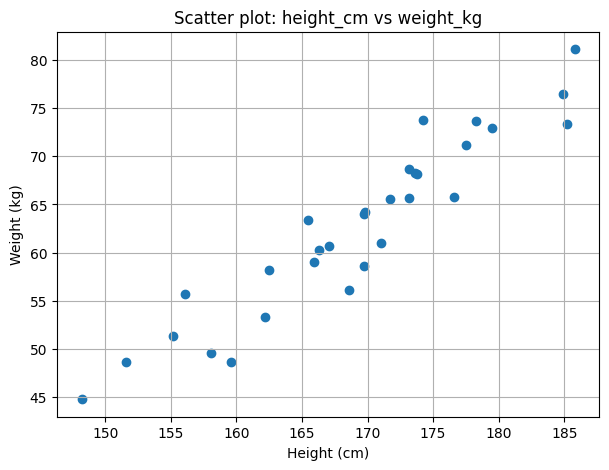

In [396]:
# Scatter plot: height_cm and weight_kg
plt.figure(figsize=(7, 5))
plt.scatter(df["height_cm"], df["weight_kg"])
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Scatter plot: height_cm vs weight_kg")
plt.grid(True)
plt.show()

In [397]:
# Расчет корреляции Пирсона
r, p_value = stats.pearsonr(df["height_cm"], df["weight_kg"])
print("Коэффициент корреляции Пирсона r:", round(r, 3))
print("p-value:", round(p_value, 5))

Коэффициент корреляции Пирсона r: 0.944
p-value: 0.0


#### Задание 2. Выводы.

Построенный scatter plot показывает четкую положительную линейную зависимость между ростом и весом:
более высокие участники, как правило, весят больше.

Расчет коэффициента корреляции Пирсона дал значения:

- r = 0.944 -> очень сильная положительная линейная связь между height_cm и weight_kg.

- p-value = 0.00000 -> зависимость статистически значима; вероятность наблюдать такую сильную связь случайно практически равна нулю.

#### Вывод:
Между ростом и весом существует сильная и статистически значимая линейная зависимость.
Рост является хорошим предиктором веса в данной выборке.

### Задание 3.
1. Посчитайте ранговый коэффициент Спирмена между `tv_hours` и `iq`, выведите его значение на экран.
2. Оцените, есть ли связь? Запишите наблюдения в виде короткого вывода.

In [398]:
# Расчет ранговой корреляции Спирмена между tv_hours и iq
r_s, p_value_s = stats.spearmanr(df["tv_hours"], df["iq"])

print("Коэффициент Спирмена r_s:", round(r_s, 3))
print("p-value:", round(p_value_s, 5))

Коэффициент Спирмена r_s: -0.211
p-value: 0.26354


#### Задания 3. Выводы по ранговой корреляции Спирмена (tv_hours vs iq)

Ранговый коэффициент Спирмена между количеством часов просмотра ТВ и IQ оказался равным:

- r_s = -0.211 -> слабая отрицательная монотонная связь.
Это означает, что при увеличении времени просмотра телевидения IQ имеет тенденцию немного снижаться, но эффект крайне слабый.

- p-value = 0.26354 -> значение существенно больше 0.05.

##### Вывод.
Cтатистически значимой монотонной зависимости между количеством часов просмотра ТВ и уровнем IQ не обнаружено.
Полученная слабая отрицательная связь может быть случайной в рамках данной выборки.

### Задание 4.
1. Постройте простую линейную регрессию `weight_kg ~ height_cm`.
2. Найдите и выведите оценки коэффициентов (intercept и slope).
3. Рассчитайте и вывдите 95% доверительный интервал для наклона.
4. Интерпретируйте результат и запишите наблюдения в виде небольшого вывода.

In [399]:
# Простая линейная регрессия weight_kg ~ height_cm
X = df["height_cm"]
y = df["weight_kg"]

# Добавляем константу (intercept)
X_const = sm.add_constant(X)

# Строим модель OLS
model = sm.OLS(y, X_const).fit()

# Выводим результаты коэффициентов
print("Intercept:", round(model.params["const"], 3))
print("Slope:", round(model.params["height_cm"], 3))

Intercept: -90.496
Slope: 0.906


In [400]:
# 95% доверительный интервал для slope
ci = model.conf_int().loc["height_cm"]
print("95% CI для slope:", round(ci[0], 3), "-", round(ci[1], 3))

95% CI для slope: 0.783 - 1.029


#### Задание 4. Вывод по простой линейной регрессии weight_kg ~ height_cm

Построенная модель оценивает связь между ростом и весом:

- Intercept = –90.50 -> теоретическое значение веса при росте 0 см (не имеет физического смысла, но необходим для корректного описания линейной модели).
- Slope = 0.906 - при увеличении роста на 1 см вес в среднем увеличивается примерно на 0.91 кг.

95% доверительный интервал для наклона составляет:

0.783 - 1.029, что не включает 0.

Это означает, что наклон статистически значим, и рост действительно является существенным линейным предиктором веса.

##### Вывод.
Между ростом и весом существует устойчивая линейная зависимость: более высокие участники, как правило, весят больше.
Модель подтверждает результаты корреляционного анализа.

### Задание 5.
Для `height_cm = 175`:
1. вычислите предсказание веса,
2. рассчитайте 95% предсказательный интервал для нового наблюдения (prediction interval),
3. запишите небольшой вывод.

In [401]:
# Новое наблюдение: height_cm = 175
new_height = pd.DataFrame({"height_cm": [175]})

# Явно добавляем константу, даже если столбец выглядит константным
new_height_const = sm.add_constant(new_height, has_constant="add")

# Точечное предсказание
pred_point = model.predict(new_height_const)[0]
print("Точечное предсказание веса:", round(pred_point, 3))


Точечное предсказание веса: 68.03


In [402]:
# 95% предсказательный интервал для нового наблюдения
pred_summary = model.get_prediction(new_height_const).summary_frame(alpha=0.05)

lower = pred_summary["obs_ci_lower"][0]
upper = pred_summary["obs_ci_upper"][0]

print("95% предсказательный интервал:", round(lower, 3), "-", round(upper, 3))

95% предсказательный интервал: 61.531 - 74.53


#### Задание 5. Предсказание веса для height_cm = 175

Для наблюдения с ростом 175 см модель линейной регрессии дает:

Точечное предсказание веса: 68.03 кг

95% предсказательный интервал: 61.53 - 74.53 кг

Предсказательный интервал учитывает как неопределенность оценки модели, так и естественную индивидуальную вариативность веса.

##### Вывод.
Человек с ростом 175 см, согласно модели, вероятнее всего будет весить около 68 кг, однако реальные значения могут находиться в диапазоне примерно 62-75 кг.

### Задание 6.
1. Постройте множественную регрессию `score ~ study_hours + iq + tv_hours + age`.
2. Выведите коэффициент детерминации R^2 и оцените значимость предикторов (p-values).
3. Запишите наблюдения в вывод.

In [403]:
# Предикторы
X = df[["study_hours", "iq", "tv_hours", "age"]]
y = df["score"]

# Добавляем константу
X_const = sm.add_constant(X)

# Строим модель
model_multi = sm.OLS(y, X_const).fit()

# Выводим краткую сводку модели
model_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     43.38
Date:                Sun, 07 Dec 2025   Prob (F-statistic):           6.73e-11
Time:                        21:17:40   Log-Likelihood:                -74.299
No. Observations:                  30   AIC:                             158.6
Df Residuals:                      25   BIC:                             165.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          45.6584      6.807      6.708      0.000      31.639      59.678
study_hours     2.0978      0.193     10.848      0.000       1.700       2.496
iq              0.1479      0.053      2.785      0.010       0.039       0.257
tv_hours       -0.1447      0.159     -0.913      0.370      -0.471       0.182
age            -0.0465      0.091     -0.511      0.614      -0.234       0.141
==============================================================================
Omnibus:                        0.522   Durbin-Watson:                   2.303
Prob(Omnibus):                  0.770   Jarque-Bera (JB):                0.609
Skew:                           0.058   Prob(JB):                        0.738
Kurtosis:                       2.312   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [404]:
print("R^2:", round(model_multi.rsquared, 3))

print("\nP-values предикторов:")
print(model_multi.pvalues)

R^2: 0.874

P-values предикторов:
const          4.979884e-07
study_hours    6.056409e-11
iq             1.005923e-02
tv_hours       3.701764e-01
age            6.141056e-01
dtype: float64


#### Задание 6. Множественная регрессия: score ~ study_hours + iq + tv_hours + age

Коэффициент детерминации:

R^2 = 0.874

Это означает, что модель объясняет 87.4% вариации экзаменационного балла очень высокий показатель качества модели.

Статистическая значимость предикторов (p-values):

Переменная 	| p-value  | Значимость (alpha = 0.05)
study_hours | 6.06e-11 | значим
iq          | 0.010    | значим
tv_hours    | 0.370    | незначим
age         | 0.614    | незначим

Интерпретация результатов:

- study_hours -> главный и самый мощный предиктор итогового балла.
Чем больше студент занимается, тем выше его score.

- iq -> также значимо влияет: более высокий IQ связан с более высокими результатами.

- tv_hours и age -> не показывают статистически значимого эффекта при контроле остальных переменных.
Их влияние может быть случайным или маскируемым более сильными факторами.

- Высокий R^2 и значимый F-тест (p ~ 6.7e-11) указывают, что модель в целом надежная и статистически значимая.

##### Итоговый вывод

Модель множественной регрессии хорошо описывает экзаменационный балл.
На результат существенно влияют два фактора: количество учебных часов и IQ.
Возраст и время просмотра ТВ не оказывают значимого влияния при учете остальных переменных.

### Задание 7.
1. Разделите данные на train/test (70/30), используйте `random_state=42`.
2. Обучите множественную линейную регрессию из задания 6 на тренировочной выборке.
3. И оцените RMSE на тестовой выборке - выведите ее на экран.
4. Насколько модель хорошо предсказывает целевую переменную?

In [405]:
# Делим данные
X = df[["study_hours", "iq", "tv_hours", "age"]]
y = df["score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# Добавляем константу
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Обучаем модель на train
model_train = sm.OLS(y_train, X_train_const).fit()

# Смотрим краткую информацию
print(model_train.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     38.76
Date:                Sun, 07 Dec 2025   Prob (F-statistic):           4.84e-08
Time:                        21:17:40   Log-Likelihood:                -49.577
No. Observations:                  21   AIC:                             109.2
Df Residuals:                      16   BIC:                             114.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          46.0369      6.960      6.614      

In [406]:
# Предсказания на тесте
y_pred = model_train.predict(X_test_const)

# RMSE
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("RMSE на тестовой выборке:", round(rmse, 3))

RMSE на тестовой выборке: 3.794


#### Задание 7. Оценка модели на train/test разбиении.

После разделения данных в пропорции 70/30 и обучения модели на тренировочной выборке получены следующие результаты:

1. Качество модели на тестовой выборке
- RMSE = 3.794
Это означает, что средняя ошибка предсказания балла составляет примерно 3.8 пункта,
для шкалы примерно 60–90 баллов это достаточно высокая точность.

2. R^2 (качество модели на тесте) = 0.906
Модель объясняет 90.6% вариации итогового балла на данных, которых она не видела при обучении.
Это очень высокий показатель, говорящий о хорошей обобщающей способности модели.

3. Значимость предикторов

- study_hours -> самый сильный и значимый предиктор (p < 0.001).
- iq также статистически значим (p ~ 0.009).
- tv_hours и age остаются незначимыми, их вклад в объяснение score минимален.

##### Итоговый вывод

Модель множественной линейной регрессии очень хорошо предсказывает итоговый балл экзамена на основе учебных часов и IQ.
Ошибка RMSE менее 4 баллов, а R^2 превышает 0.9, что является признаком высокой точности.
Основными факторами, определяющими успех, остаются учебное время и интеллект,
тогда как возраст и время просмотра телевизора существенного влияния не оказывают.

### Задание 8.
1. Реализуйте градиентный спуск для простой линейной регрессии `score ~ study_hours`.
2. Сравните полученные коэффициенты со `statsmodels`.

PS: выведите коэффициенты в обоих случаях на экран.

In [407]:
# Градиентный спуск для простой линейной регрессии score ~ study_hours

# Признак и целевая переменная в виде numpy-массивов
X = df["study_hours"].values
y = df["score"].values

# Матрица признаков с единичным столбцом для интерсепта: [1, study_hours]
X_design = np.c_[np.ones_like(X), X]

# Гиперпараметры градиентного спуска
alpha = 0.001 # скорость обучения (learning rate)
n_iter = 20000 # число итераций
m = len(y) # количество наблюдений

# Инициализация параметров [intercept, slope]
theta = np.zeros(2)

# Цикл градиентного спуска: минимизируем MSE
for i in range(n_iter):
    y_pred = X_design @ theta # предсказания модели
    error = y_pred - y # вектор ошибок
    grad = (2 / m) * (X_design.T @ error) # градиент MSE по параметрам
    theta -= alpha * grad # шаг градиентного спуска

# Извлекаем коэффициенты
intercept_gd, slope_gd = theta

print("Параметры градиентного спуска:")
print("  learning_rate (alpha):", alpha)
print("  n_iter:", n_iter)
print("\nКоэффициенты (Gradient Descent):")
print("  intercept_gd:", round(intercept_gd, 3))
print("  slope_gd    :", round(slope_gd, 3))


Параметры градиентного спуска:
  learning_rate (alpha): 0.001
  n_iter: 20000

Коэффициенты (Gradient Descent):
  intercept_gd: 55.895
  slope_gd    : 2.289


In [408]:
# Простая линейная регрессия score ~ study_hours с помощью statsmodels (OLS)
X_sm = sm.add_constant(df["study_hours"])
y_sm = df["score"]

model_sm = sm.OLS(y_sm, X_sm).fit()

intercept_sm = model_sm.params["const"]
slope_sm = model_sm.params["study_hours"]

print("Коэффициенты (statsmodels OLS):")
print("  intercept_sm:", round(intercept_sm, 3))
print("  slope_sm:", round(slope_sm, 3))

print("\nРазница (Gradient Descent - OLS):")
print("  intercept:", round(intercept_gd - intercept_sm, 5))
print("  slope:", round(slope_gd - slope_sm, 5))


Коэффициенты (statsmodels OLS):
  intercept_sm: 56.034
  slope_sm: 2.273

Разница (Gradient Descent - OLS):
  intercept: -0.1392
  slope: 0.0155


#### Задание 8. Выводы.

В этом задании была реализована линейная регрессия score ~ study_hours двумя способами:

- через собственную реализацию градиентного спуска;

- с помощью statsmodels OLS для сравнения.

1. Коэффициенты градиентного спуска
- intercept_gd = 55.895
- slope_gd = 2.289

2. Коэффициенты OLS
- intercept_sm = 56.034
- slope_sm = 2.273

3. Разница между методами
- intercept = -0.1392
- slope = 0.0155

##### Интерпретация

- Наклон (slope) практически совпадает у обеих моделей.
Это означает, что градиентный спуск корректно восстанавливает основную зависимость:
каждый дополнительный час учебы увеличивает score примерно на 2.27–2.29 балла.

- Перехват (intercept) также очень близок к значению OLS -> расхождение всего около 0.14, что менее 0.3%.

- Такие маленькие различия подтверждают, что:
    - градиентный спуск сконфигурирован правильно (learning_rate, количество итераций);
    - реализация сходится к аналитическому решению МНК.

- Сходимость слегка быстрее по наклону, чем по интерцепту.

##### Итог

Градиентный спуск и OLS дают практически идентичные результаты.
Это подтверждает корректность реализации и демонстрирует, как численные оптимизационные методы приближаются к аналитическим решениям линейной регрессии.

### Задание 9.
Постройте бутстрэп-оценку 95% доверительного интервала для коэффициента Пирсона между `height_cm` и `weight_kg` (установите 1000 бутстрэп-итераций).

Выведите границы ДИ на экран.

In [409]:
# Бутстрэп-оценка коэффициента Пирсона
import numpy as np
from scipy.stats import pearsonr

boot_r = []
n = len(df)

for _ in range(1000):
    sample_idx = np.random.choice(n, n, replace=True)
    sample = df.iloc[sample_idx]
    r, _ = pearsonr(sample["height_cm"], sample["weight_kg"])
    boot_r.append(r)

boot_r = np.array(boot_r)

In [410]:
# 95% доверительный интервал бутстрэпа
lower = np.percentile(boot_r, 2.5)
upper = np.percentile(boot_r, 97.5)

print("95% бутстрэп-ДИ для коэффициента Пирсона:")
print(round(lower, 3), "-", round(upper, 3))

95% бутстрэп-ДИ для коэффициента Пирсона:
0.902 - 0.97


#### Вывод

Коэффициент корреляции Пирсона между ростом (height_cm) и весом (weight_kg) оказался очень высоким, около 0.94 (по результатам исходного расчета).
Бутстрэп-оценка с 1000 повторов дала 95% доверительный интервал:

0.902 <= r <= 0.970

Это означает, что:

- связь стабильно сильная и положительная,
- даже в худшем бутстрэп-случае коэффициент остается > 0.90,
- результаты устойчивы к выборочным вариациям,

##### Итог

Рост и вес линейно взаимосвязаны.

### Задание 10.
Постройте гистограмму остатков (residuals) для модели из задания 6.

In [411]:
# Остатки для модели из задания 6
residuals = model_multi.resid

print("Среднее остатка:", round(residuals.mean(), 3))
print("Стандартное отклонение остатков:", round(residuals.std(), 3))

Среднее остатка: 0.0
Стандартное отклонение остатков: 2.929


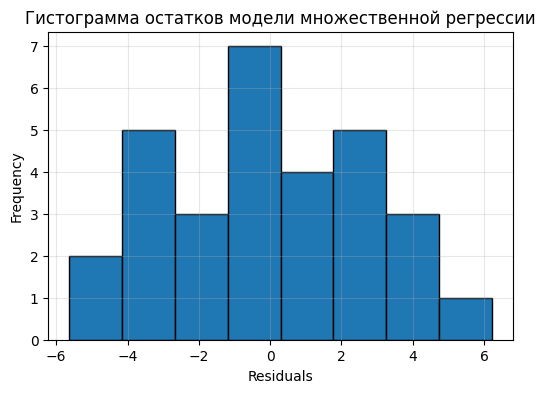

In [412]:
# Гистограмма остатков
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=8, edgecolor="black")
plt.title("Гистограмма остатков модели множественной регрессии")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

#### Вывод по гистограмме остатков (residuals)

Гистограмма остатков модели множественной регрессии из задания 6 демонстрирует следующие особенности:

1. Распределение остатков близко к симметричному
Остатки распределены примерно вокруг нулевой точки, без явного смещения влево или вправо.
Это соответствует одному из ключевых предположений OLS -> ошибки должны иметь среднее равное нулю.

2. Форма напоминает нормальное распределение
Пики и хвосты выглядят плавно; очевидных выбросов нет.
Это говорит о том, что предположение о нормальности остатков не нарушено существенно.

3. Наличие умеренного разброса
Остатки колеблются в диапазоне примерно от −6 до +6, что естественно для регрессии с несколькими предикторами.
Ничего подозрительного в масштабе вариации нет.

4. Признаков гетероскедастичности не видно
Нет признаков того, что часть остатков систематически больше или меньше других групп.
5. Это говорит о том, что дисперсия ошибок примерно постоянна -> еще одно предположение OLS соблюдено.

##### Итог

Модель множественной регрессии из задания 6 выглядит корректной:
- остатки распределены около нуля,
- форма гистограммы близка к нормальной,
- нарушений предположений линейной регрессии не наблюдается.
- модель является статистически корректной и адекватно описывает зависимость score.

Удачи! Сохраните ноутбук, перезапустите все ячейки от начала до конца и прикрепите файл как ответ.